### Trabalho Final de Python para Ciência de Dados
#### Aluno: Renan Lemes Leepkaln
#### Aluno: Matheus Cleiton Pinheiro Cosme
#### Aluno: Getro Lucas da Silva Filho


In [1]:
import numpy as np 
import pandas as pd
from datetime import date, timedelta


### Análise 1

In [2]:
# função para transformar código de semana em tipo data
def transform_to_date(week_code: str) -> date:
    """
    :param week_code: Código do dia da semana
    :type week_code: string

    Return:
        date: Dia de referencia da semana (começando em 01/01/2022)
    """

    week_add = int(week_code.split('W')[1])
    return date(2022, 1, 1) + timedelta(weeks=week_add)

In [3]:
# lendo dados
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
df.iloc[:5,:5]

,Product_Code,W0,W1,W2,W3
0,P1,11,12,10,8
1,P2,7,6,3,2
2,P3,7,11,8,9
3,P4,12,8,13,5
4,P5,8,5,13,11


#### 1. Transforme o data frame do formato wide para long (Aplicar função para transformar o dado W[0-51] em dia da semana disponibilizada no arquivo week_day.py)

In [4]:
# transformar dado de wide para long
df_wide = df.iloc[:,0:53]
df_long = df_wide.melt('Product_Code',
                       df_wide.columns[1:],
                       'Week',
                       'Sales_Transactions'
                )
df_long.tail()

,Product_Code,Week,Sales_Transactions
42167,P815,W51,0
42168,P816,W51,5
42169,P817,W51,3
42170,P818,W51,0
42171,P819,W51,1


In [5]:
# decodificando a coluna Semana
df_long['Week'] = df_long['Week'].apply(transform_to_date)
df_long.set_index('Week', inplace=True)
df_long.head()

,Product_Code,Sales_Transactions
Week,,
2022-01-01,P1,11
2022-01-01,P2,7
2022-01-01,P3,7
2022-01-01,P4,12
2022-01-01,P5,8


#### 2. Escolha três produtos (de forma aleatória; pode utilizar semente) e construa um gráfico com o valor de transação de cada um dos produtos selecionados ao longo do tempo.

In [6]:
# definido produtos aleatórios
produtos_aleatorios = df_long['Product_Code'].sample(n=3, random_state=30).to_list()
produtos_aleatorios

# filtrando dataframe
df_filtrado = df_long.query('Product_Code in @produtos_aleatorios')
df_filtrado.head()

,Product_Code,Sales_Transactions
Week,,
2022-01-01,P199,4
2022-01-01,P551,5
2022-01-01,P754,0
2022-01-08,P199,1
2022-01-08,P551,8


In [7]:
# importando biblioteca de gráficos
import plotly.express as px

# plotando gráfico
fig = px.line(
    df_filtrado,
    color='Product_Code',
    width=900,
    height=450,
    labels={
        'value':' Sales Transactions',
        'Product_Code' : 'Product Code'
    }
)
fig.show()

#### 3. Por produto calcule a diferença entre as semanas e gere um gráfico da série temporal da diferença ao longo das semanas.

In [8]:
# criando coluna com as diferenças
df_filtrado = df_filtrado.sort_values(by='Week')

df_filtrado.loc[:,'Sales_Diff'] = df_filtrado['Sales_Transactions'].diff()

fig2 = px.line(
    df_filtrado,
    y='Sales_Diff',
    color='Product_Code',
    width=900,
    height=450,
    labels={
        'Sales_Diff':' Sales Transactions Diff',
        'Product_Code' : 'Product Code'
    }
)
fig2.show()

#### 4. Calcule as descritivas de cada produto (média, desvio-padrão, mínimo, mediana, máximo)


In [9]:
estatisticas = df_filtrado.groupby('Product_Code').agg(['mean', 'std', 'min', 'median', 'max'])
estatisticas

Sales_Transactions                          Sales_Diff            \
                           mean       std min median max       mean       std   
Product_Code                                                                    
P199                   3.326923  2.036155   0    3.0   8  -0.450980  5.112000   
P551                   9.153846  3.051098   3    9.0  16   6.500000  3.754736   
P754                   0.942308  0.872532   0    1.0   3  -6.096154  4.225319   

                                 
               min median   max  
Product_Code                     
P199         -12.0    1.0   7.0  
P551          -3.0    6.0  15.0  
P754         -15.0   -7.0   2.0

#### 5. Calcule a média móvel de cada 3 semanas e gere um gráfico contendo as médias móveis de um produto.

In [10]:
df_filtrado['Media_Movel'] = df_filtrado['Sales_Transactions'].rolling(window=3).mean().round(2)
produto = produtos_aleatorios[0]
fig3 = px.line(
    df_filtrado.query('Product_Code == @produto'),
    y='Media_Movel',
    width=900,
    height=450,
    labels={'Media_Movel':'Media Movel'},
    title=f'Média móvel das vendas do produto {produto}'
)
fig3.show()

------

### Análise 2

In [11]:
# Leitura do arquivo 'Womens Clothing E-Commerce Reviews.csv'
# Seleção das colunas de interesse e renomeação

path = 'Womens Clothing E-Commerce Reviews.csv'

review = pd.read_csv(path)
review = review[['Review Text','Recommended IND']]
review.rename(columns={'Review Text': 'Comentário', 'Recommended IND': 'Recomendação'}, inplace = True)
review

,Comentário,Recomendação
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


#### 1. Calcule a distribuição da variável de recomendação (RecommendedIND)

In [12]:
### 1) DISTRIBUIÇÃO DA VARIÁVEL DE RECOMENDAÇÃO ###

recom = review['Recomendação'].sum()
n_recom = review['Recomendação'].count() - review['Recomendação'].sum()
perc_recom = recom/(recom+n_recom) * 100
perc_n_recom = n_recom/(recom+n_recom) * 100


print(f"""Número de compradores que indicam o produto: {recom}. 
Número de compradores que NÃO indicam o produto: {n_recom}.
---
Percentual de compradores que indicam o produto: {perc_recom:.2f}%.
Percentual de compradores que NÃO indicam o produto: {perc_n_recom:.2f}%.""")


Número de compradores que indicam o produto: 19314. 
Número de compradores que NÃO indicam o produto: 4172.
---
Percentual de compradores que indicam o produto: 82.24%.
Percentual de compradores que NÃO indicam o produto: 17.76%.


In [13]:
### 2) NORMALIZAÇÃO DO TEXTO ###

# criação da função para normalizar o texto

def norm_text(texto: pd.Series) -> pd.Series:
    """Carrega uma série com uma coluna de textos, passa tudo para letras
    minusculas e remove os espaços duplos

    texto(pd.Series): serie com coluna de textos
    Return
    texto_normalizado: texto com letras minusculas e sem espaços duplos
    """

    texto_normalizado = texto.copy()

    for k in range(0,len(texto)):
        texto_normalizado[k] = ' '.join(str(texto_normalizado[k]).lower().split())
    
    return texto_normalizado

In [14]:
### 2) NORMALIZAÇÃO DO TEXTO ###

# criação da função para normalizar o texto

def norm_text(texto: pd.Series) -> pd.Series:
    """Carrega uma série com uma coluna de textos, passa tudo para letras
    minusculas e remove os espaços duplos

    texto(pd.Series): serie com coluna de textos
    Return
    texto_normalizado: texto com letras minusculas e sem espaços duplos
    """

    texto_normalizado = texto.copy()

    for k in range(0,len(texto)):
        texto_normalizado[k] = ' '.join(str(texto_normalizado[k]).lower().split())
    
    return texto_normalizado

In [15]:
# criando uma série com os textos da review, que será a entrada da função criada

review_text = review['Comentário']
texto_normalizado = norm_text(review_text)

# substituindo coluna normalizada na coluna original
review['Comentário'] = texto_normalizado
review

,Comentário,Recomendação
0,absolutely wonderful - silky and sexy and comf...,1
1,love this dress! it's sooo pretty. i happened ...,1
2,i had such high hopes for this dress and reall...,0
3,"i love, love, love this jumpsuit. it's fun, fl...",1
4,this shirt is very flattering to all due to th...,1
...,...,...
23481,i was very happy to snag this dress at such a ...,1
23482,"it reminds me of maternity clothes. soft, stre...",1
23483,"this fit well, but the top was very see throug...",0
23484,i bought this dress for a wedding i have this ...,1


In [16]:
### WORDCLOUD PARA AS FRASES EM QUE A RECOMENDAÇÃO DO PRODUTO É 1 ###

# filtrando as linhas em que houve recomendação do produto
review_1 = review.copy()
review_1 = review_1.loc[review.Recomendação == 1]

# colocando as palavras das reviews em uma string
words = (review_1['Comentário'].values)
words = ",".join(str(x) for x in words)
words = words.replace('\n','').replace('.','').replace(',','').replace('-','')

In [17]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [18]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

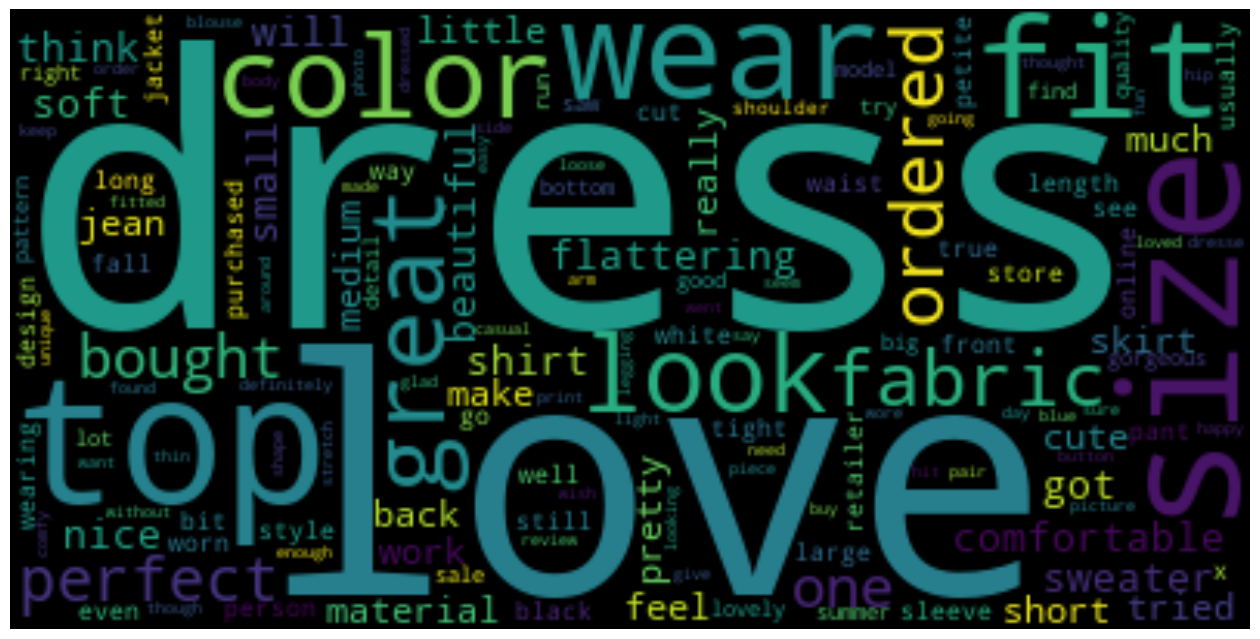

In [19]:
# Gráfico

wc = WordCloud(stopwords=STOPWORDS).generate(words)
plt.figure(figsize=[16,16])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
### 4) DATAFRAME COM A OCORRÊNCIA DAS PALAVRAS NAS FRASES ###

#selecionando as frases dos comentários da review
frases_review = review['Comentário']

#criando um dicionário
dicio = {}

for k in range (0,len(frases_review)):          #varredura em cada frase da review
    frase = frases_review.loc[k].split()        
    frase = list(set(frase))                    #eliminar palavras duplicadas em uma mesma frase
    for j in range(0,len(frase)):               # varredura em cada palavra da frase
        palavra = frase[j]
        if palavra in dicio.keys():
            dicio[palavra] += 1
        else:
            dicio[palavra] = 1   

In [21]:
# criando o DataFrame
serie_palavras = pd.Series(dicio)
df_palavras = pd.DataFrame(serie_palavras)
df_palavras.rename(columns={0:'Ocorrência'},inplace = True)
df_palavras

,Ocorrência
-,1896
sexy,138
wonderful,199
silky,98
absolutely,792
...,...
(hopefully!),1
isn't?!).,1
cheeky!,1
"blaring,",1


In [22]:
###  5 PALAVRAS MAIS FREQUENTES ###

df_palavras_orden = df_palavras.sort_values('Ocorrência', ascending=False)
df_palavras_orden.head(5)

,Ocorrência
the,19676
and,19504
i,18913
a,17741
this,16295


In [23]:
# 5 Palavras mais frequentes não pertencentes a STOPWORDS

frases_review2 = review['Comentário']

dicio2 = {}

for k in range (0,len(frases_review2)):          
    frase2 = frases_review2.loc[k].split()        
    frase2 = list(set(frase2))                    
    for j in range(0,len(frase2)):               
        palavra2 = frase2[j]
        if palavra2 in STOPWORDS:      #desconsiderando as STOPWORDS
            pass
        else:
            if palavra2 in dicio2.keys():
                dicio2[palavra2] += 1
            else:
                dicio2[palavra2] = 1
                
serie_palavras2 = pd.Series(dicio2)
df_palavras2 = pd.DataFrame(serie_palavras2)
df_palavras2.rename(columns={0:'Ocorrência'},inplace = True)
df_palavras2_orden = df_palavras2.sort_values('Ocorrência', ascending=False)
df_palavras2_orden.head(5)

,Ocorrência
love,7170
size,5273
fit,5143
wear,5136
dress,5017


-----

### Análise 3

#### 1. Unifique os dois dataframes em um utilizando o campo id_visita, preencha os dados faltantes com valor 0

In [51]:
import matplotlib.pyplot as plt

In [24]:
df1 = pd.read_csv("receita.csv")
df2 = pd.read_csv("visitas.csv")

In [25]:
df1.head()

,id_visita,receita
0,pch1227,3557.05
1,dep1756,4.80
2,ten1521,280.11
3,ahk6325,4.20
4,jwa3254,6.73


In [26]:
df2.head()

,id_cliente,id_visita
0,1741,ehk5182
1,4352,fzl5743
2,8575,qlx5758
3,7225,dtp4776
4,4457,zji2851


In [27]:
df = pd.merge(df1,df2, on="id_visita", how="outer")


In [28]:
df.fillna(0, inplace=True)

In [29]:
df.head()

,id_visita,receita,id_cliente
0,pch1227,3557.05,5144
1,dep1756,4.80,1288
2,ten1521,280.11,5374
3,ahk6325,4.20,1383
4,jwa3254,6.73,1762


#### 2. Clacule as descritivas a seguir por id 
* a) Média incluindo visitas sem receitas
* b) Média excluindo visitas sem receitas
* c) Percentual de visitas com receita

In [30]:
## Letra a
df_inclui_receita =  df.groupby("id_visita")['receita'].mean()
df_inclui_receita.to_frame().head()

,receita
id_visita,
aaa1188,0.0
aaa1365,0.0
aaa1661,0.0
aaa1738,0.0
aaa1811,0.0


In [33]:
## Letra b
df_sem_receita = df_inclui_receita[df_inclui_receita != 0]
df_sem_receita =  df_sem_receita.to_frame()
df_sem_receita.head()

,receita
id_visita,
aaa2214,286.27
aaa4345,840.78
aaa5142,250.10
aaa6833,157.17
aaa8141,3804.85


In [32]:
## Letra c

total = len(df) ## total de visitas
visitas = len(df_sem_receita) ## visitas que não tem o valor 0 

precent = (visitas / total) * 100

precent

9.999919442380154

#### 3. Crie um algoritmo que faça os seguintes passos 
* Para a opção b anterior de 1 até 1000.
* Gere uma amostra (com reposição) do dataframe original.
* Calcule a média de receita da amostra (considerando a visita sem receita)
* Armazene esse valor em uma lista com o valor de b e uma lista com os valores de média 
* Crie um dataframe utilizando essas listas.


In [34]:
df_sem_receita

,receita
id_visita,
aaa2214,286.27
aaa4345,840.78
aaa5142,250.10
aaa6833,157.17
aaa8141,3804.85
...,...
zzy8787,1687.64
zzz4743,921.80
zzz5266,369.40


In [49]:
list_boots = []
for i in range(1000):
    df_bootstrap = df_sem_receita.sample(n=1000, replace=True)
    list_boots.append(df_bootstrap["receita"].mean())
df_boots = pd.DataFrame(list_boots)
df_boots.rename(columns={0: 'media_amostrada'}, inplace=True)


In [50]:
df_boots

,media_amostrada
0,1006.62132
1,1046.23067
2,999.43064
3,1050.50949
4,996.05193
...,...
995,998.91103
996,986.34484
997,991.87430
998,1033.03736


#### 4. Crie uma visualização para a distribuição da coluna media_amostrada no passo 3.

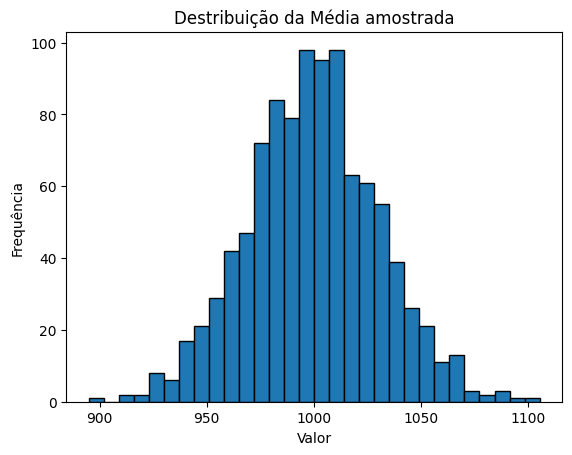

In [52]:
plt.hist(df_boots["media_amostrada"],  bins=30, edgecolor='black')
plt.title('Destribuição da Média amostrada')
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()